<a href="https://colab.research.google.com/github/Mikeyjud401/Mikeyjud401-/blob/main/Capstone_Project_Reference_Notebook_Loan_Default_Prediction_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Context**

* A Home Equity Loan is an option for homeowners who need to access cash and have sufficient equity in their home. It is used to borrow money at a better interest rate than a credit card or personal loan. The loan enables the borrower to meet financial goals. At the same time, the interest associated with the loan generates revenues for the lender. There are considerable risks associated with this type of financing. A customers inability to make payments can lead to foreclosure. This process is both costly and time consuming for the bank. The lenders can be at risk if the real estate prices drop. In this case, he equity might no longer suffice to cover the loan. Therefore, every lending organization would want to access their clients repayment abilities in advance before deciding on the approval of the loans.

* The approval process for the loans is multifaceted. Through this process the bank tries to check the creditworthiness of the applicant based on the manual study of various aspects of the application. The process is effort-intensive and prone to biases, wroing judgement, and human error.

* The focus is on leveraging a data science approach to predict and understand the applicants profile to minimize the risk of future loan defaults.

## **Objective**

* Build a robust classification model to predict clients who are likely to default on their loan and give reccomendations to the bank on the important features to consider while approving a loan.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [ ]:
hm=pd.read_csv("/content/sample_data/hmeq.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
# Returns top 5 rows of the data
data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# Returns last 5 rows of the data
data.tail(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [ ]:
# Display shape of the data
data.shape

(5960, 13)

## Observations
* The data has 5960 rows and 13 columns



In [ ]:
# Check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


## Observations
 * The bulk of the data is numerical with the exception of REASON and JOB which have categorical data types.
 * From a quick glace we can already see the dataset has null values within the features.

In [ ]:
# Check for missing values
data.isnull()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,False,False,False,False,False,False,False,False,False,False,False,False
5956,False,False,False,False,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check the percentage of missing values in each column.
percent_missing=data.isnull().sum() * 100 / len(data)
print(percent_missing.sort_values())

BAD         0.000000
LOAN        0.000000
VALUE       1.879195
CLNO        3.724832
REASON      4.228188
JOB         4.681208
CLAGE       5.167785
NINQ        8.557047
YOJ         8.640940
MORTDUE     8.691275
DELINQ      9.731544
DEROG      11.879195
DEBTINC    21.258389
dtype: float64


## Observations

* The columns DEROG and DEBTINC have the most missing values.
* The missing values are in small quantities for different variables. We would not drop any missing variables because this will result in a loss of information.
* The columns REASON and JOB are of the object type. The missing values will be replaced with the most frequent value i.e for JOB the missing values will be replaced with "Other", for REASON the missing values will be replaced with "DebtCon"
* The numerical colmuns will be replaced by the median value of the respective column.

## Convert data type

In [ ]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
cols = data.select_dtypes(["object"]).columns.tolist()

In [ ]:
# Changing the data type of an object type column to category
for i in cols:
     data[i] = data[i].astype("category")

In [ ]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(2), float64(9), int64(2)
memory usage: 524.3 KB


## Summary Statistics

In [ ]:
# Analyze the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


## Observations

* The average LOAN amount is $18,607.
* YOJ is positively skewed. At least 50% of the applicants are 7 years at their current job, which shows stable income.
* DEROG and DELINQ have a right-skewed distribution which shows that at least 75% of the applicants have 0 negative credit reports.
* LOAN, MORTDUE, and VALUE have high rates range, indicating a diverse finacial status of applicants. The mean is much larger than the median which indicates a right-skewed distribution.
* CLAGE shows a diverse history of a credit line, which indicates that the applicants have a diverse credit history and financial status.
* The majority of applicants have 1 credit card and 21 lines of credit. There are some extreme values with the max of 17 cards and 71 lines.

In [ ]:
# Check summary for categorical data
data.describe(include=["category"]).T


,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


## Observation

* Both of the categorical variables has very few unique values.

In [ ]:
# Checking the count of unique values in each categorical column

cols_cat= data.select_dtypes(["category"])
for i in cols_cat.columns:
  print("Unique values in",i,"are :")
  print(data[i].value_counts(normalize=True))
  print("*"*40)

Unique values in REASON are :
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************
Unique values in JOB are :
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************


## Observations

* Both columns REASON and JOB are object types or categorical data. Missing values can be replaced with the most frequent value.


## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


The percentage of defaulters in the data is BAD
0    80.050336
1    19.949664
Name: count, dtype: float64 %


[]

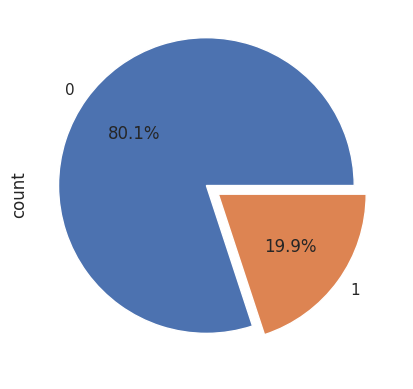

In [ ]:
# How many defaulters
perc_default = data['BAD'].value_counts() / len(data['BAD'])
print(f'The percentage of defaulters in the data is {perc_default*100} %')
data['BAD'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

## Observations

* 80% of the clients have successfully repaid their loans (BAD=0)
* 20% of the clients are defaulter on their loans (BAD=1)

In [ ]:
def show_value_counts(col):
    print(col)
    value_counts = data[col].value_counts()
    percentage = value_counts / len(data) * 100
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentage})
    result_df = result_df.sort_values(by='Value')
    print(result_df)
    print('--------------------------')
    generate_pie_plot(result_df)


def generate_pie_plot(data_frame):
    plt.figure(figsize=(6, 5))
    plt.pie(data_frame['Count'], labels=data_frame['Value'], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

REASON
           Value  Count  Percentage
REASON                             
DebtCon  DebtCon   3928   65.906040
HomeImp  HomeImp   1780   29.865772
--------------------------


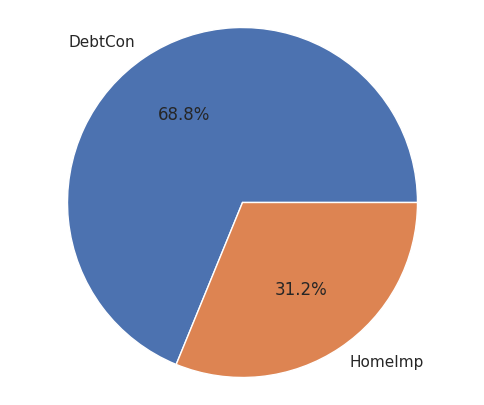

In [ ]:
#Show unique categories in the REASON variable
show_value_counts('REASON')

## Observations

* The majority of clients have taken out loans for debt consolidation.
* A smaller portion of clients have taken out loans for home improvement.

JOB
           Value  Count  Percentage
JOB                                
Mgr          Mgr    767   12.869128
Office    Office    948   15.906040
Other      Other   2388   40.067114
ProfExe  ProfExe   1276   21.409396
Sales      Sales    109    1.828859
Self        Self    193    3.238255
--------------------------


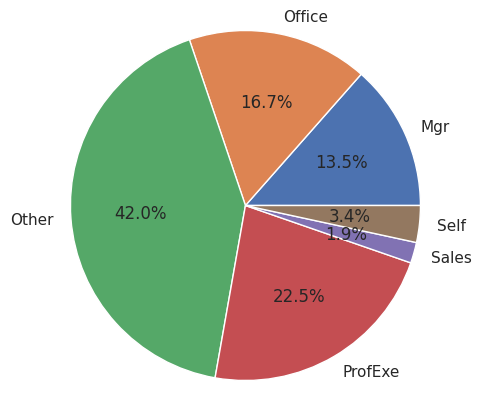

In [ ]:
#Show unique categories in the JOB variable
show_value_counts('JOB')

## Observations

* The highest number of clients is in job category "Other".
* "ProfExe" is the most common job category followed by "Office" and "Mgr".
* "Mgr", "Self", and "Sales" job categories have relatively smaller representations.

BAD
Skew : 1.5


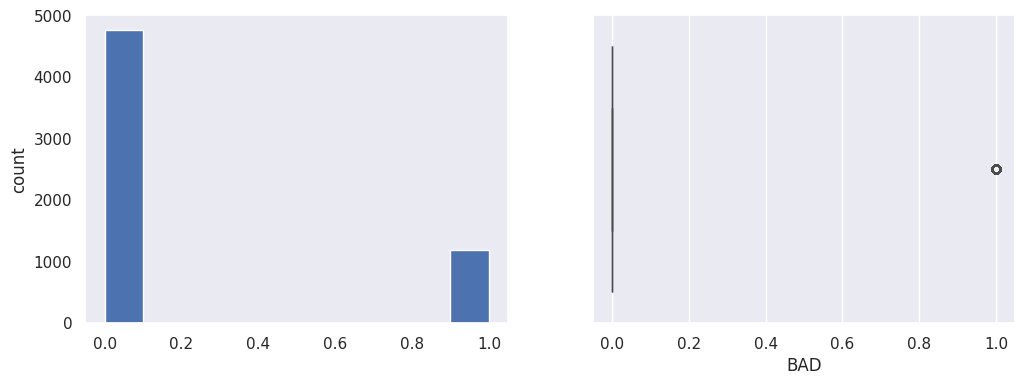

LOAN
Skew : 2.02


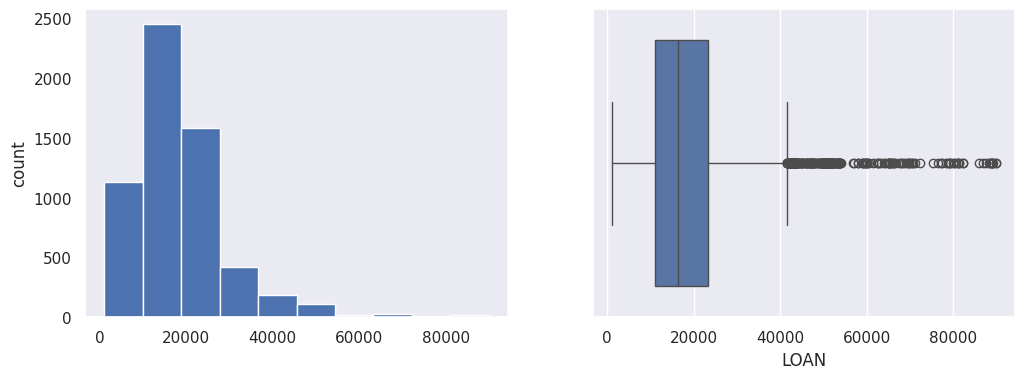

MORTDUE
Skew : 1.81


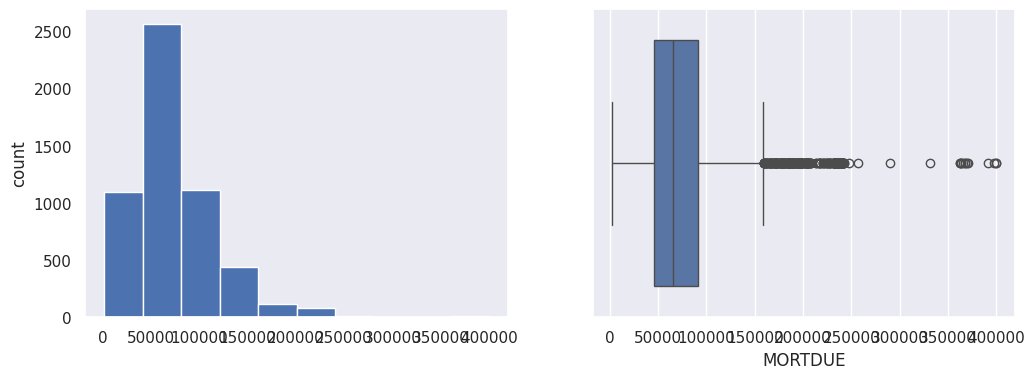

VALUE
Skew : 3.05


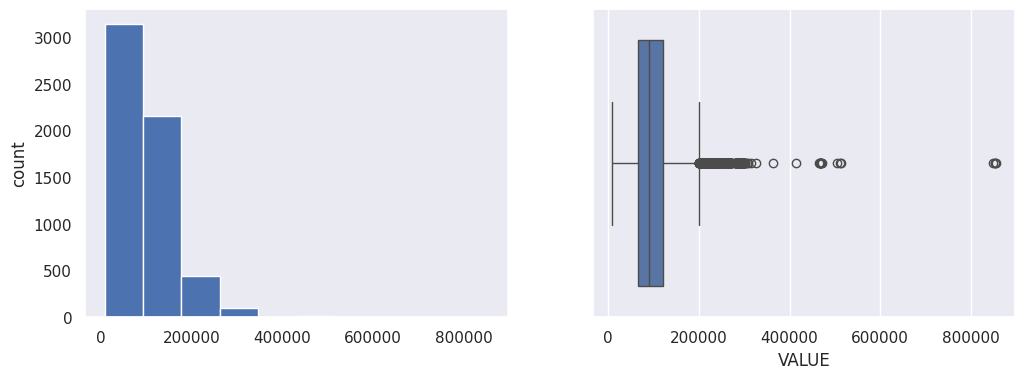

YOJ
Skew : 0.99


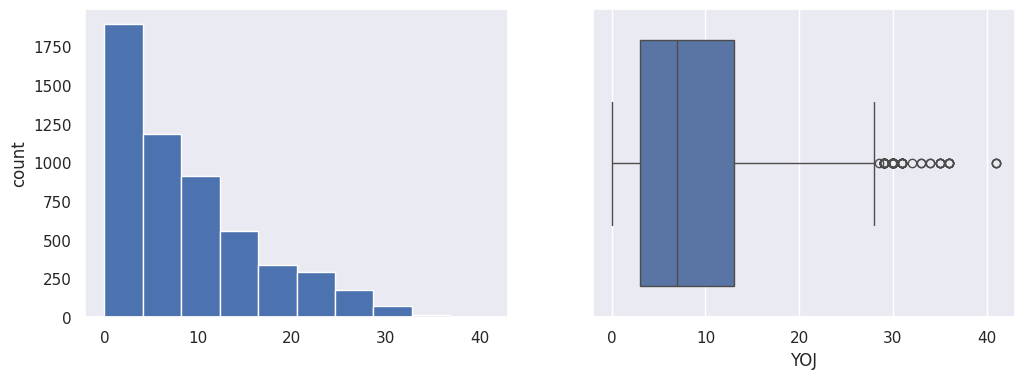

DEROG
Skew : 5.32


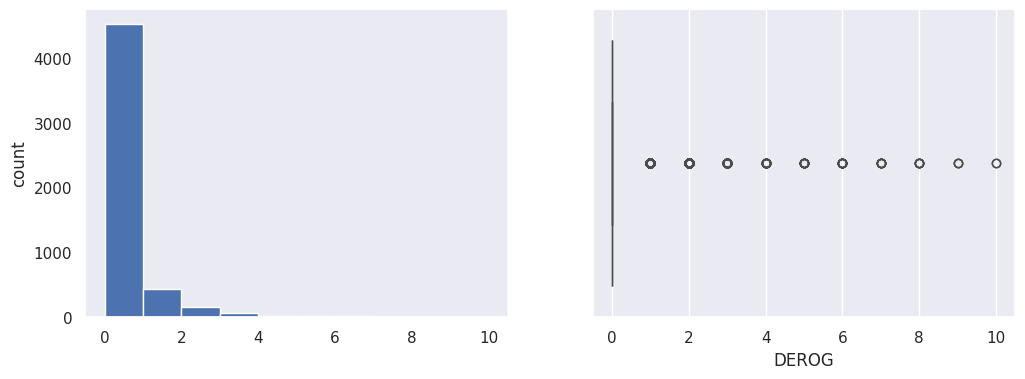

DELINQ
Skew : 4.02


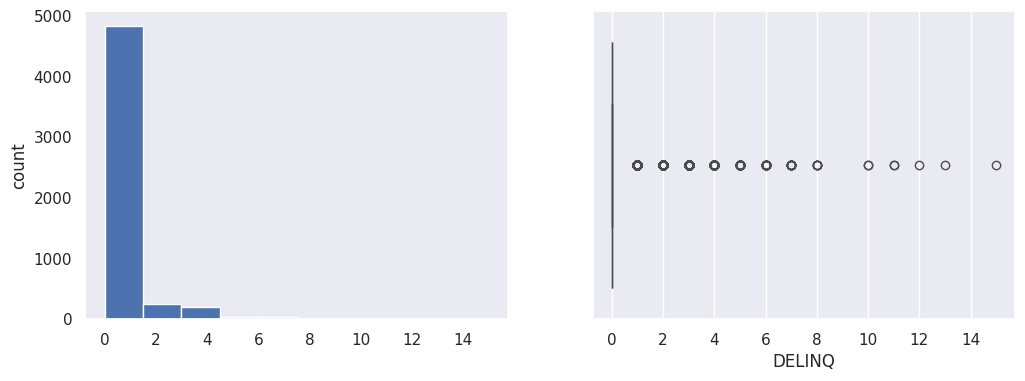

CLAGE
Skew : 1.34


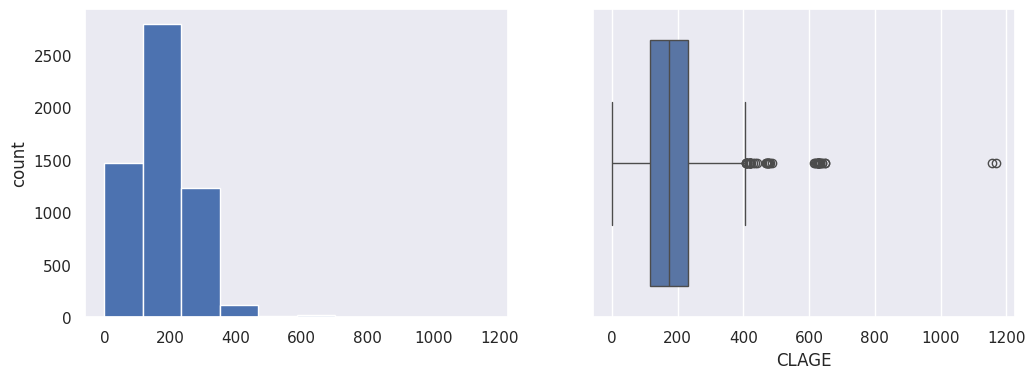

NINQ
Skew : 2.62


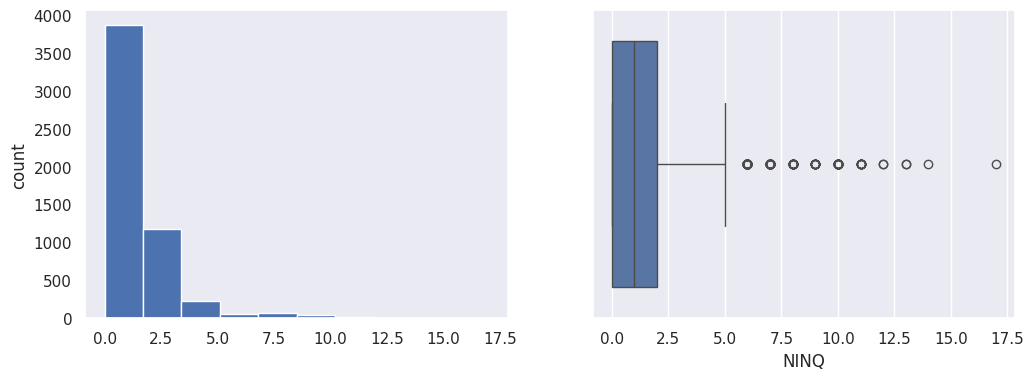

CLNO
Skew : 0.78


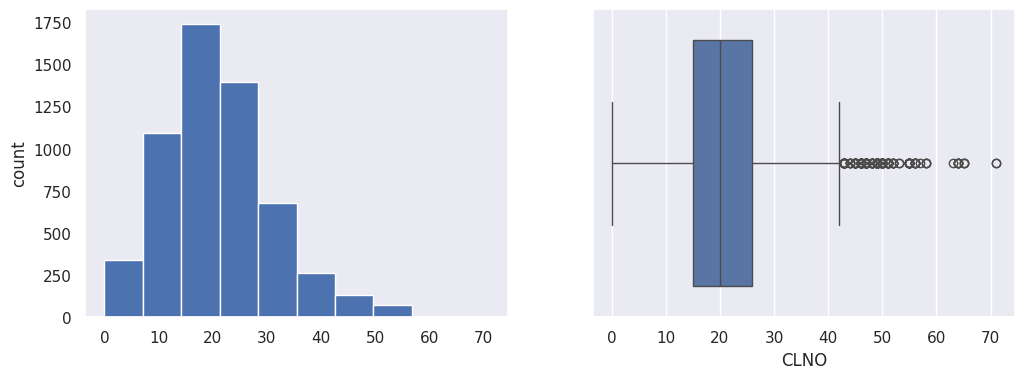

DEBTINC
Skew : 2.85


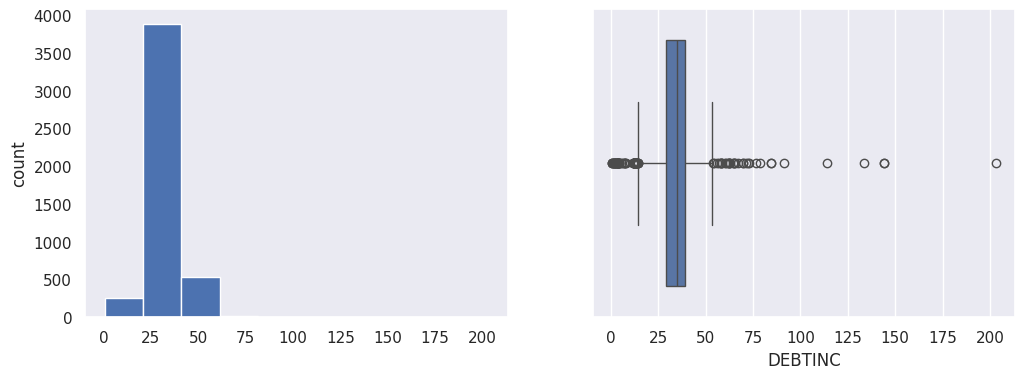

In [ ]:
# Univariate Analysis for numerical Data
num_data = data.select_dtypes('number')

for col in num_data:
    print(col)

    print('Skew :',round(data[col].skew(), 2))

    plt.figure(figsize = (12, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

##  Observations

* LOAN, MORTDUE, VALUE, CLNO, and DEBTINC have the most outliers.
* All the variables except DEBTINC have a right-skewed distriibution with outliers on the right end.
* DEBTINC ratio is the only variable that shows outliers on the right and left ends.
* DEROG and DELIQ show very few major reports of credit deliquent credit lines. Creating a binary variable with 0 for no report/deliquent credit lines and 1 for more reports/deliquent credit lines may be convenient.
* The majority of the features except DEBTINC have a right-skewed distribution with outliers towards the right end.
* The " typical client" has a loan of ~$15,000, a mortgage of  ~$75,000, and the value of their property is ~$100,000.
* The "typical client" has ~5 years at their current job.
* The "typical client" has ~20 existing credit lines when the oldest one is ~200 months.
* The "typical client" has a Debt-to-income ratio between 25% to 50%.
* The "typical client" has a credit history with no major deogatory report, 1 deliquent credit line and ~1 credit inquiry.
* Identifying the clients that are not typical clients might help in predicting which clients are likely to default on their loan.

### **Bivariate Analysis**

<Axes: xlabel='BAD', ylabel='LOAN'>

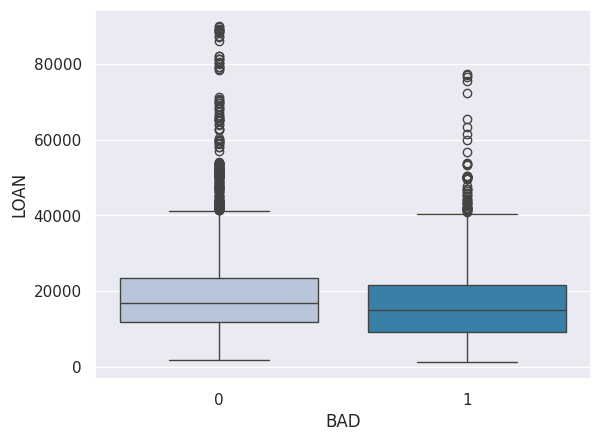

In [ ]:
#Analyze BAD vs Loan
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

## Observations

* Clients who defaulted or not receive the same amount of loans.

<Axes: xlabel='BAD', ylabel='MORTDUE'>

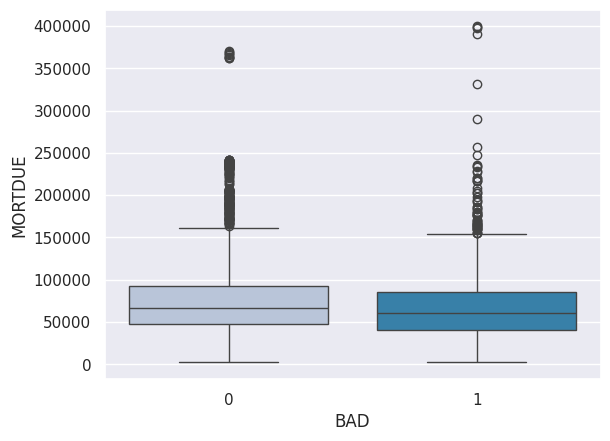

In [ ]:
#Analyze BAD vs MORTDUE
sns.boxplot(x=data["BAD"],y=data['MORTDUE'],palette="PuBu")

## Observations

* Clients who defaulted or not have the same amount due on the existing mortgage.



<Axes: xlabel='VALUE', ylabel='MORTDUE'>

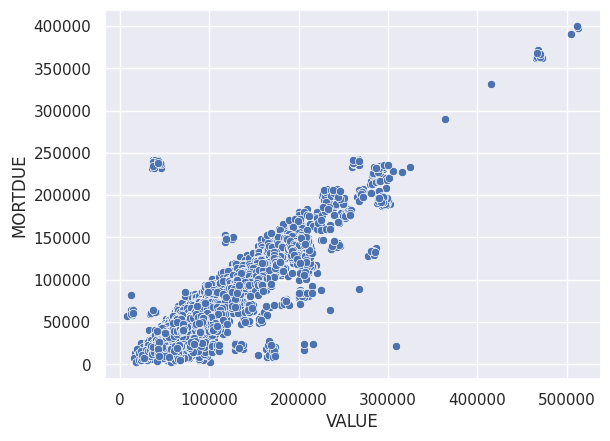

In [ ]:
#scatterplot VALUE vs MORTDUE
sns.scatterplot(x=data["VALUE"],y=data['MORTDUE'],palette="PuBu")

## Observations

* Theres a linear correlation between VALUE and MORTDUE.

<Axes: xlabel='LOAN', ylabel='VALUE'>

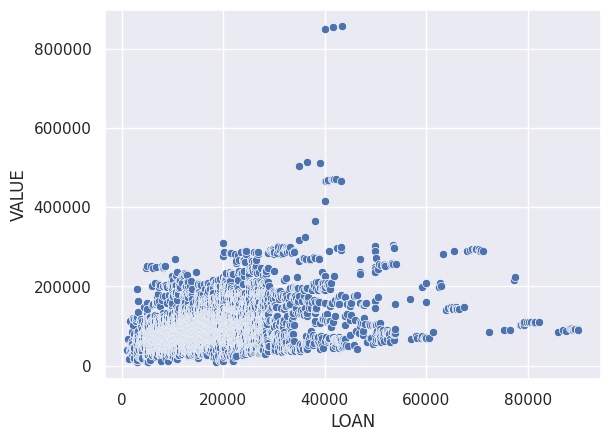

In [ ]:
#scatterplot VALUE vs LOAN
sns.scatterplot(x=data["LOAN"],y=data['VALUE'],palette="PuBu")

## Observations

* There is no correlation between the value of the property and loan default rate.

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780
------------------------------------------------------------------------------------------------------------------------


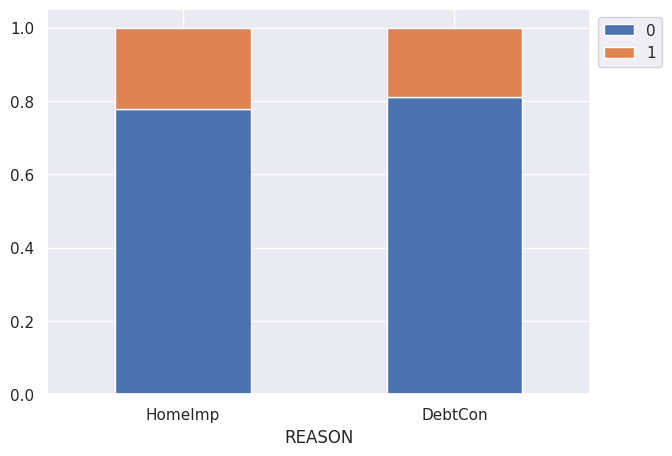

In [ ]:
stacked_barplot(data, "REASON", "BAD")

## Observations

* Both home improvement or debt consolidation does not make a difference on loan defaulter or not.

### **Multivariate Analysis**

## Analyze Correlation Heatmap for Numerical Variables

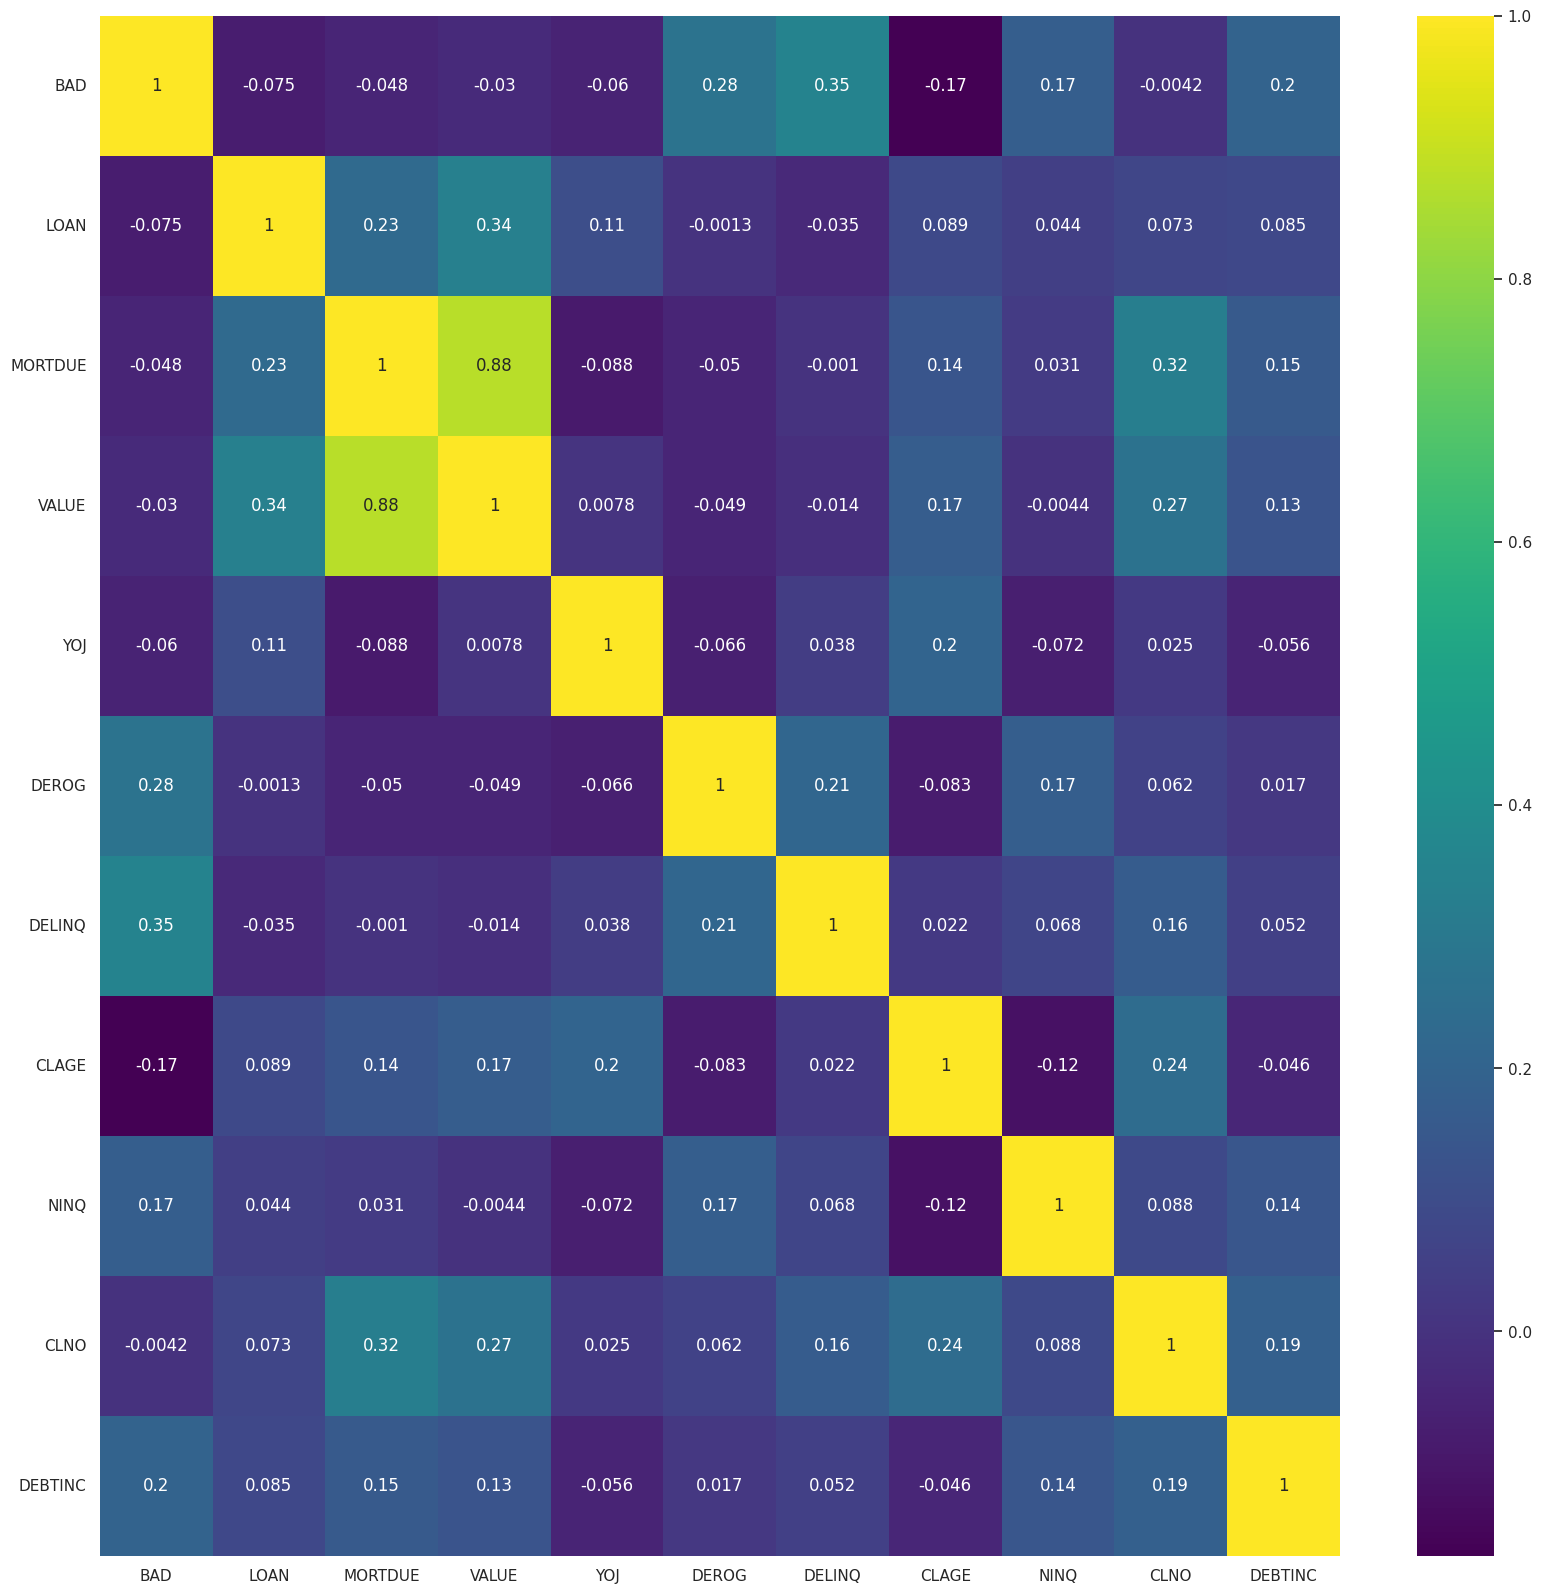

In [ ]:
# Create a figure and plot the heatmap
plt.figure(figsize=(20, 20))
heat_map = sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="viridis")
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()

## Treating Outliers

In [ ]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1 = data[col].quantile(q = 0.25) # 25th quantile
    Q3 = data[col].quantile(q = 0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = (Q1 - 1.5 * IQR)  #define lower whisker
    Upper_Whisker = (Q3 + 1.5 * IQR)  # define upper Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)

    return data

In [ ]:
print(cols)

['REASON', 'JOB']


In [ ]:
cols.append('BAD')

In [ ]:
print(cols)

['REASON', 'JOB', 'BAD']


In [ ]:
for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

## Treating Missing Values

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

data_cleaned = treat_outliers_all(df_raw,numerical_col)

In [ ]:
print(data_cleaned["BAD"].unique())

[1, 0]
Categories (2, int64): [0, 1]


In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(data,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    data[new_col] = data[col].isnull()
    return data

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in data_cleaned.columns if data_cleaned[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data_cleaned,colmn)

## Filling the missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data_cleaned.select_dtypes('number')

# Select string and object columns.
cat_data = data_cleaned.select_dtypes('category').columns.tolist() #df.select_dtypes('object')

# Fill numeric columns with median.
data_cleaned[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data_cleaned[column].mode()[0]
    data_cleaned[column] = data_cleaned[column].fillna(mode)

In [ ]:
#checking that there are no missing values
data_cleaned.isnull().sum()

,0
BAD,0
LOAN,0
MORTDUE,0
VALUE,0
REASON,0
JOB,0
YOJ,0
DEROG,0
DELINQ,0
CLAGE,0


## Adding new columns in the dataset for set for each column which has missing values

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(data,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    data[new_col] = data[col].isnull()
    return data

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)


## Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
print(data["BAD"].unique())

[1, 0]
Categories (2, int64): [0, 1]


In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist() #df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [ ]:
#checking that there are no missing values
data.isnull().sum()

,0
BAD,0
LOAN,0
MORTDUE,0
VALUE,0
REASON,0
JOB,0
YOJ,0
DEROG,0
DELINQ,0
CLAGE,0


# Observations

* All missing values are imputed.



In [ ]:
data.head().T

,0,1,2,3,4
BAD,1,1,1,1,0
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860.0,70053.0,13500.0,65019.0,97800.0
VALUE,39025.0,68400.0,16700.0,89235.5,112000.0
REASON,HomeImp,HomeImp,HomeImp,DebtCon,HomeImp
JOB,Other,Other,Other,Other,Office
YOJ,10.5,7.0,4.0,7.0,3.0
DEROG,0.0,0.0,0.0,0.0,0.0
DELINQ,0.0,2.0,0.0,0.0,0.0
CLAGE,94.366667,121.833333,149.466667,173.466667,93.333333


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## Observations

* The mean number of major derogatory reports is statistically higher for defaulted loans.
* The mean number of delinquent credit lines is statistically higher for default loans.
* There is a positive relationship between the MORTDUE Amount and the VALUE of the property.
* There is a negative tendency between delinquent credit lines (DELINQ) vs. LOAN amount.
* There is a negative tendency between the number of derogatory reports (DEROG) vs. the LOAN amount.
*As the number of DELINQ/DEROG increases, the loan amount decreases
* There is a moderate positive correlation between the target variable (BAD) and credit history- DELINQ, DEROG.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## Data preparation

* We want to predict who is likely to default on a loan.
* Before I proceed to build a model, I'll have to encode categorical features.
* I will split the data into train and test sets to be able to evaluate the model that we build on the train data.
* I will tune the model and prune the tree, if required


In [ ]:
# Separating the target variable and other variables
X = data_cleaned.drop(columns = ['BAD'])
X = pd.get_dummies(X,drop_first=True)
y = data_cleaned['BAD']

print(X.shape, y.shape)

(5960, 27) (5960,)


In [ ]:
print(y.unique())

[1, 0]
Categories (2, int64): [0, 1]


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4172, 27) (1788, 27)


In [ ]:
y.value_counts()

,count
BAD,
0,4771
1,1189


In [ ]:
print("Shape of the training set: ", X_train.shape)
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 27)
Shape of the test set:  (1788, 27)
Percentage of classes in the training set:
BAD
0    0.804171
1    0.195829
Name: proportion, dtype: float64
Percentage of classes in the test set:
BAD
0    0.791946
1    0.208054
Name: proportion, dtype: float64


## Model Evaluation Criterion

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)
    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
    acc = accuracy_score(target, pred)                                 # To compute accuracy score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

### Logistic Regression

* Since the data is imbalanced, we will define the model with class weights as a standard parameter as “balanced”

In [ ]:
# Defining the Logistic regression model
lg = LogisticRegression(class_weight='balanced')
lg

LogisticRegression(class_weight='balanced')

In [ ]:
# Fitting the model on the training data
lg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.89      0.61      0.72      3355
           1       0.30      0.69      0.42       817

    accuracy                           0.63      4172
   macro avg       0.60      0.65      0.57      4172
weighted avg       0.78      0.63      0.66      4172



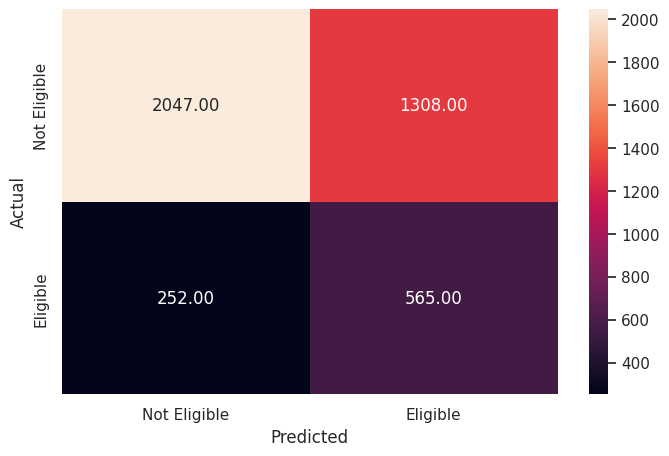

In [ ]:
#Predict for train set
y_pred_train = lg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1416
           1       0.31      0.68      0.43       372

    accuracy                           0.62      1788
   macro avg       0.60      0.64      0.57      1788
weighted avg       0.76      0.62      0.66      1788



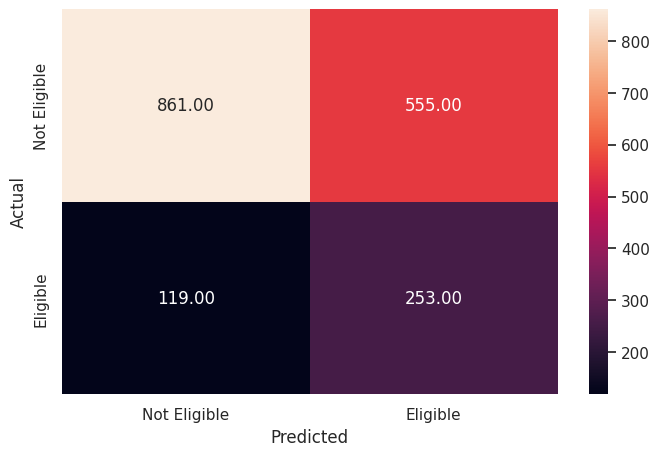

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)

#checking the performance on the train dataset
metrics_score(y_test, y_pred_test)

In [ ]:
lg_test = model_performance_classification(lg,X_test,y_test)
lg_test

,Precision,Recall,Accuracy
0,0.595845,0.644079,0.623043


## Observations

* We are getting an accuracy of about 62% on the train and the test datasets.
* The recall for this model is only 69% for class 1 on the train data and 68% test data.
* As the recall is low this model will not perform well on in detecting applicants that will default on a loan, meaning it will lead to the bank loss on a defaulted loan

## Checking the coefficients

Let's check the coefficients and find which variables are leading to loan default and which can help to reduce the default.

In [ ]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,5.252290e-02
DEBTINC_missing_values_flag,2.069815e-02
NINQ,2.013823e-02
VALUE_missing_values_flag,3.375284e-03
REASON_HomeImp,1.135684e-03
CLAGE_missing_values_flag,9.256013e-04
JOB_Self,8.793729e-04
JOB_Other,6.038841e-04
JOB_Sales,5.655994e-04
CLNO_missing_values_flag,2.251548e-04


The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [ ]:
# Finding the odds
odds = np.exp(lg.coef_[0])

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
DEBTINC,1.053927
DEBTINC_missing_values_flag,1.020914
NINQ,1.020342
VALUE_missing_values_flag,1.003381
REASON_HomeImp,1.001136
CLAGE_missing_values_flag,1.000926
JOB_Self,1.000880
JOB_Other,1.000604
JOB_Sales,1.000566
CLNO_missing_values_flag,1.000225


## Observations

* Features that positively affect loan default: DEBTINC, CLNO, NINQ, DEBTINC_missing_values_flag,YOJ, JOB_Other,VALUE_missing_values_flag, REASON_HomeImp, CLAGE_missing_values_flag, JOB_Self, JOB_Sales, CLNO_missing_values_flag, REASON_missing_values_flag, MORTDUE_missing_values_flag
* Features that negatively affect loan default: VALUE, MORTDUE, LOAN, NINQ_missing_values_flag, JOB_ProfExe, YOJ_missing_values_flag, JOB_missing_values_flag, JOB_Office, CLAGE
* High debt-to-income ratio increases the odds of default on a loan 1.05 times more than a low debt-to-income ratio. high DEBTINC indicates that the applicant can not afford his/hers monthly mortgage payments, and having too much debt can be a sign of missing a payment or defaulting on the loan.

## Precision-Recall Curve for Logistic Regression

In [ ]:
# Import the necessary library
from sklearn.metrics import precision_recall_curve

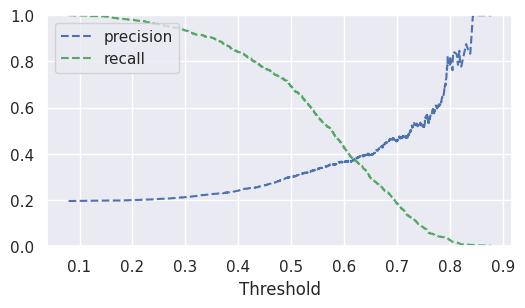

In [ ]:
y_scores_lg = lg.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (6, 3))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 1])
plt.show()

## Observations

* We can see that the precision and the recall are balanced for a threshold of about 0.6
* Let's find out the performance of the model at this threshold.

## Logistic regresstion model using 0.6 treshold

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      3355
           1       0.37      0.43      0.39       817

    accuracy                           0.74      4172
   macro avg       0.61      0.62      0.61      4172
weighted avg       0.76      0.74      0.75      4172



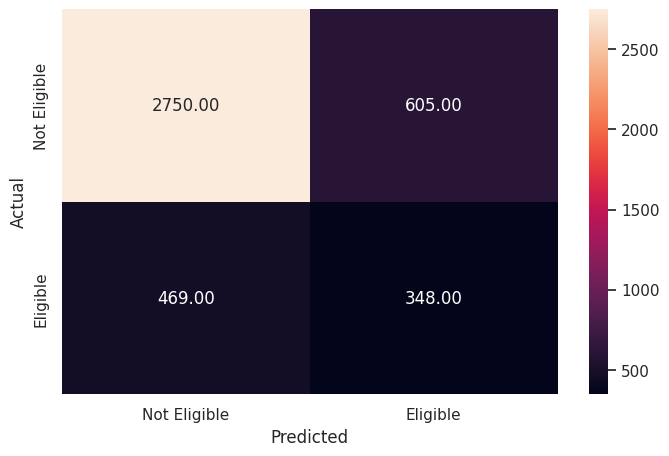

In [ ]:
# Checking the performance on the train dataset
optimal_threshold1 = .6

y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1416
           1       0.39      0.41      0.40       372

    accuracy                           0.74      1788
   macro avg       0.61      0.62      0.62      1788
weighted avg       0.75      0.74      0.74      1788



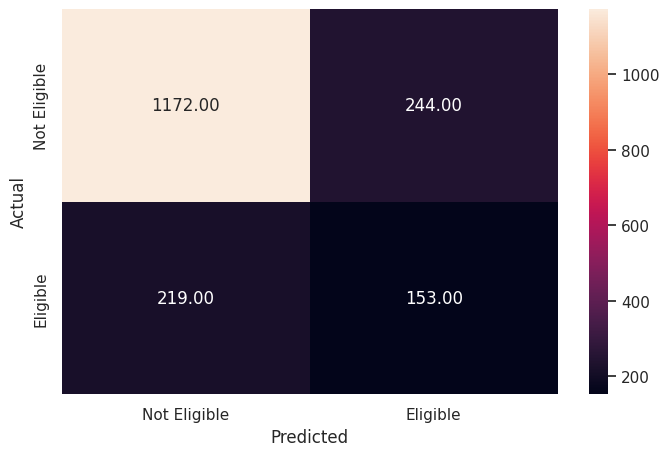

In [ ]:
# Checking the performance on the test dataset
optimal_threshold1 = .6

y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

In [ ]:
lg_6_test = model_performance_classification(lg,X_test,y_test)
lg_6_test

,Precision,Recall,Accuracy
0,0.595845,0.644079,0.623043


## Observations

* The accuracy score increases to 74% on the train and the test datasets
* The recall score decreases to 43% for class 1 on the train data and 41% for test data.
* As the recall is very low this model will not perform well on in detecting applicants that will default on a loan, meaning it will lead to the bank loss on a defaulted loan
* Since we are interested in higher recall let's see if we can get a better result using with a decreased treshold

## Logistic regression model using 0.45 threshold

              precision    recall  f1-score   support

           0       0.89      0.48      0.62      3355
           1       0.26      0.77      0.39       817

    accuracy                           0.53      4172
   macro avg       0.58      0.62      0.51      4172
weighted avg       0.77      0.53      0.58      4172



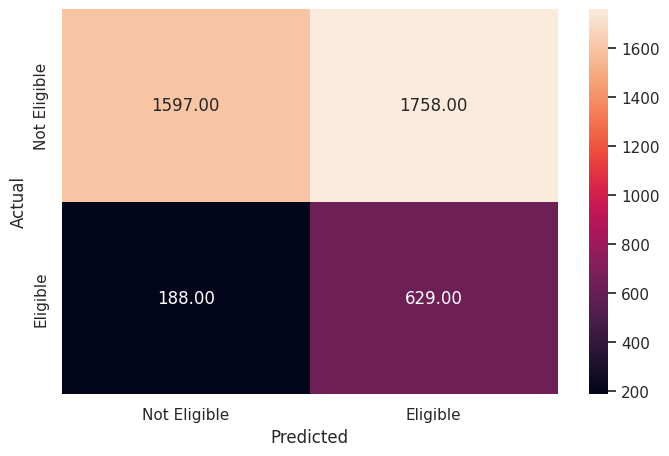

In [ ]:
# Checking the performance on the train dataset
optimal_threshold1 = .45

y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.88      0.48      0.62      1416
           1       0.27      0.74      0.40       372

    accuracy                           0.54      1788
   macro avg       0.58      0.61      0.51      1788
weighted avg       0.75      0.54      0.58      1788



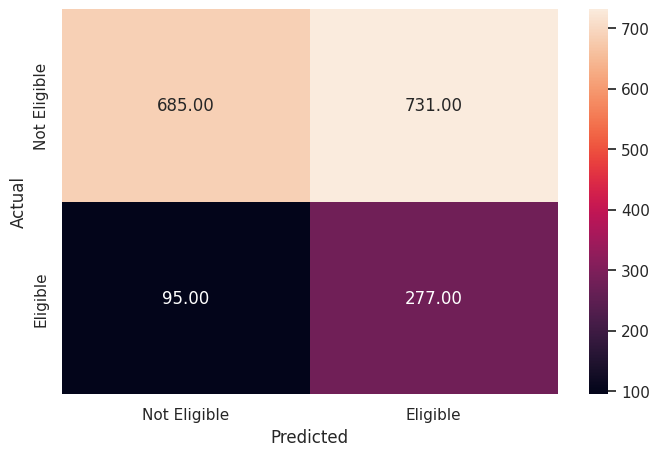

In [ ]:
# Checking the performance on the test dataset
optimal_threshold1 = .45

y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

In [ ]:
lg_45_test = model_performance_classification(lg,X_test,y_test)
lg_45_test

,Precision,Recall,Accuracy
0,0.595845,0.644079,0.623043


## Observations

* As expected the accuracy score decreased to 53%
* The recall score increased to 77% for class 1 on the train data and 74 % for test data.
* Although the recall score increased significantly the total preference of the model is not sufficient considering the performance score criteria we have defined.

### Decision Tree

## Data Preparation for the tree based model
Using the original data treated for missing values

In [ ]:
# Separating the target variable and other variables
X = data_cleaned.drop(columns = ['BAD'])
X = pd.get_dummies(X,drop_first=True)
y = data_cleaned['BAD']

print(X.shape, y.shape)

(5960, 27) (5960,)


In [ ]:
print(y.unique())

[1, 0]
Categories (2, int64): [0, 1]


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4172, 27) (1788, 27)


In [ ]:
print("Shape of the training set: ", X_train.shape)
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 27)
Shape of the test set:  (1788, 27)
Percentage of classes in the training set:
BAD
0    0.804171
1    0.195829
Name: proportion, dtype: float64
Percentage of classes in the test set:
BAD
0    0.791946
1    0.208054
Name: proportion, dtype: float64


In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1)

# Fitting the decision tree classifier on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



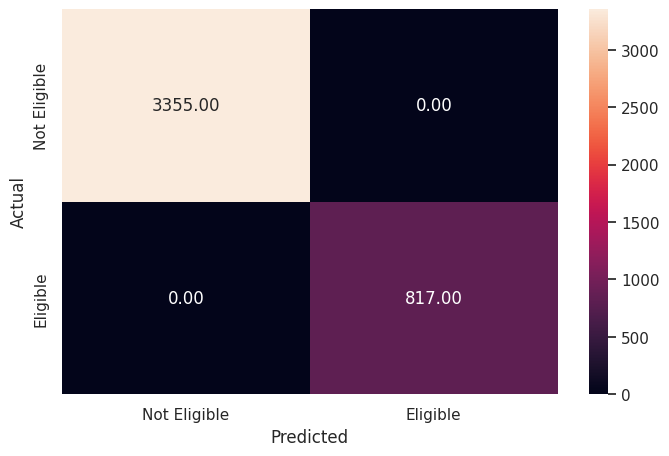

In [ ]:
# Checking performance on the training data
Y_pred_train1 = dt.predict(X_train)

metrics_score(y_train, Y_pred_train1)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1416
           1       0.71      0.58      0.64       372

    accuracy                           0.86      1788
   macro avg       0.80      0.76      0.78      1788
weighted avg       0.86      0.86      0.86      1788



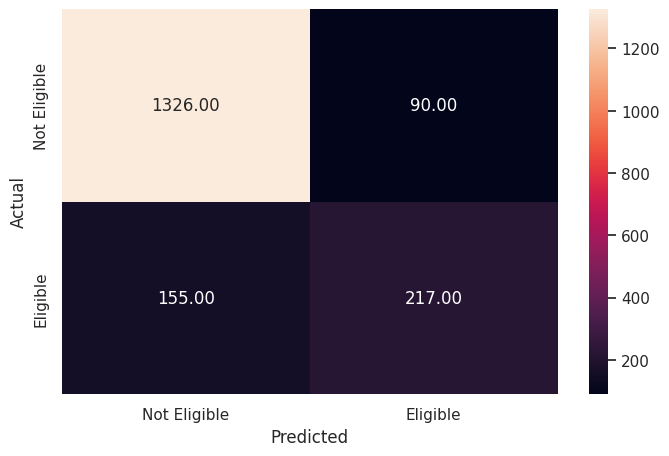

In [ ]:
# Checking performance on the testing data
Y_pred_test1 = dt.predict(X_test)

metrics_score(y_test, Y_pred_test1)

In [ ]:
dtree_test = model_performance_classification(dt,X_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.801091,0.759887,0.862975


## Observations

* The Decision Tree gives 100% score for the train data set, i.e. the Decision Tree is overfitting the training data.
* The recall is 58% in comparison to 1 for the training dataset.
* The precision on the test data suggests that there's a ~30% (1 - 0.7) chance that the model will predict that a loan will default even though it would not.


<Axes: xlabel='Importance', ylabel='None'>

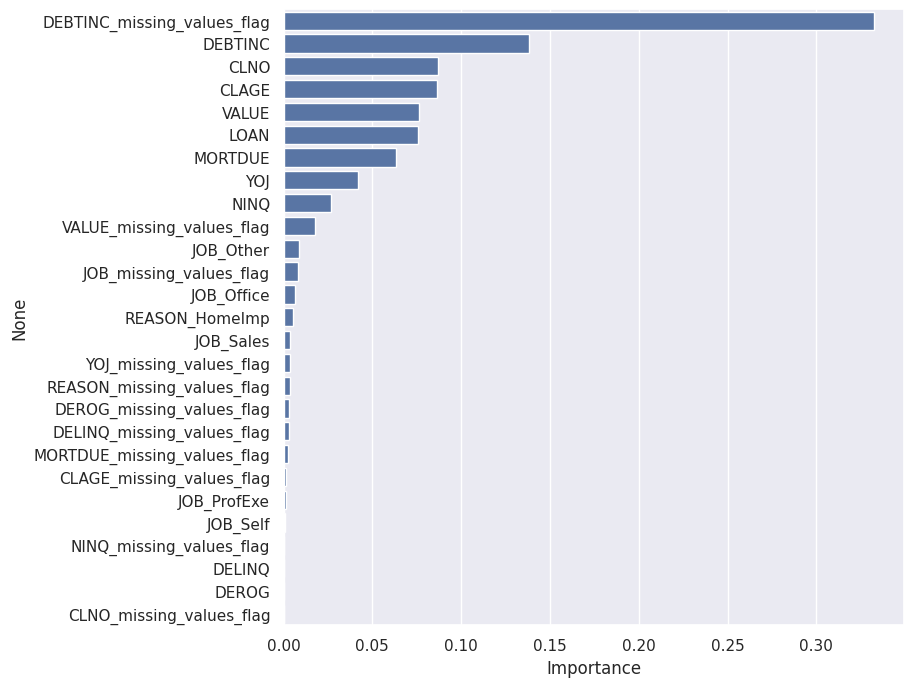

In [ ]:
# Checking the feature importance
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

## Observations

* According to the Decision Tree, DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC. This signifies that applicants who are at risk of default a loan have high debt and relatively low income
* The other important features CLNO, LOAN, CLAGE, VALUE, MORTDUE.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


## Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = 'balanced')

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(9),
                       min_samples_leaf=25, random_state=7)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3355
           1       0.57      0.85      0.68       817

    accuracy                           0.84      4172
   macro avg       0.76      0.85      0.79      4172
weighted avg       0.88      0.84      0.86      4172



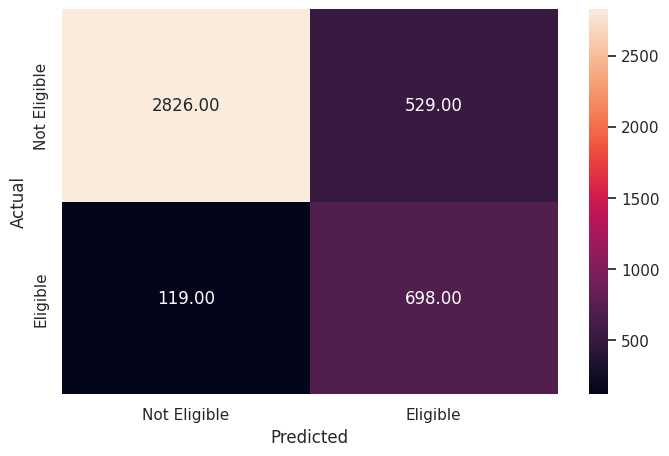

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1416
           1       0.56      0.78      0.65       372

    accuracy                           0.83      1788
   macro avg       0.75      0.81      0.77      1788
weighted avg       0.86      0.83      0.84      1788



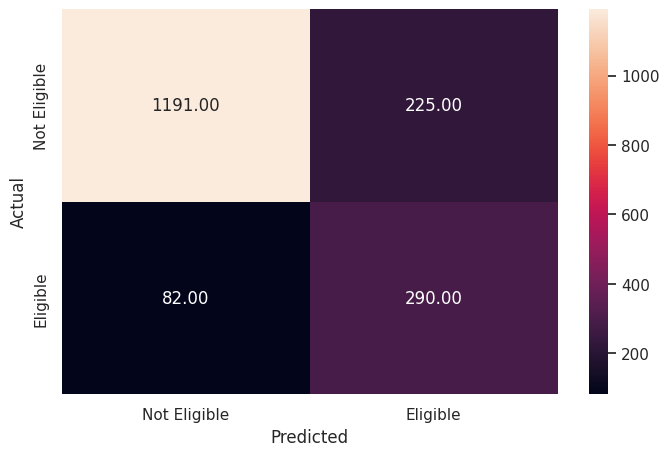

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_tuned_test = model_performance_classification(d_tree_tuned,X_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.749346,0.810336,0.8283


## Observations

* This model is not overfitting the training data and the recall score increases to 78% for the test set
* Precision has gone down from 71% to 56%
* The model gives consistent result for the train and test data sets

<Axes: xlabel='Importance', ylabel='None'>

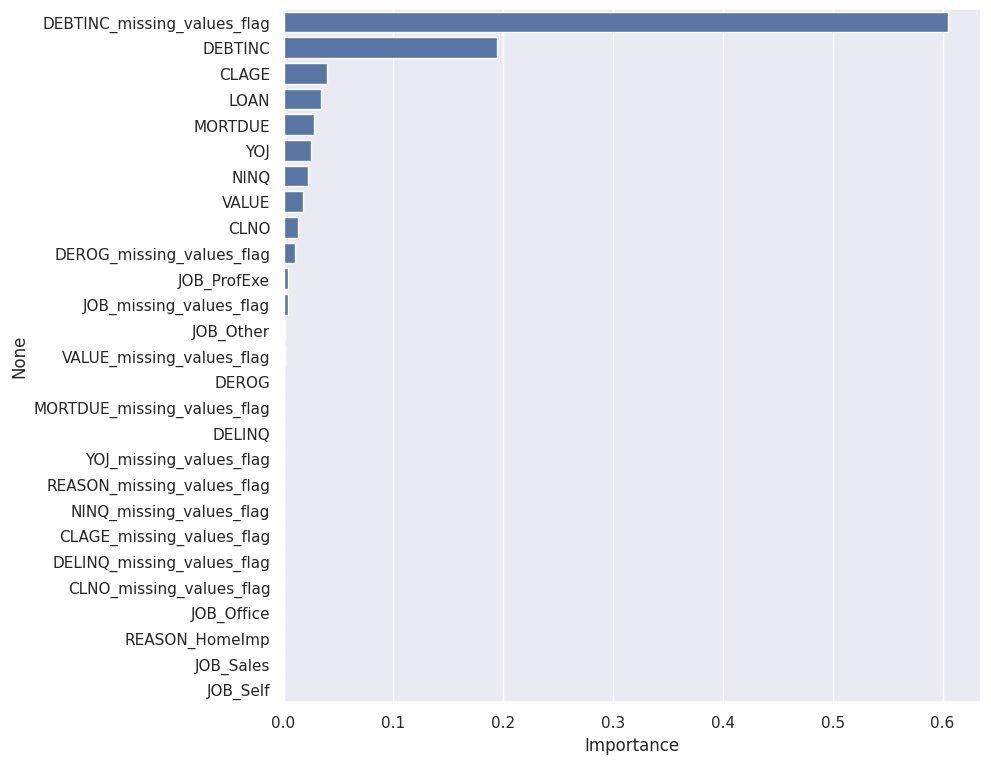

In [ ]:
# Checking the tuned decision tree feature importance
importances =d_tree_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (9, 9))
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

## Observations

* After tuning the DT model we are getting fewer features that are important.
* According to this model too, the DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC.
* The other features are much less impactful in defaulting on a loan.
* The tuned model is more generalized than the default model.

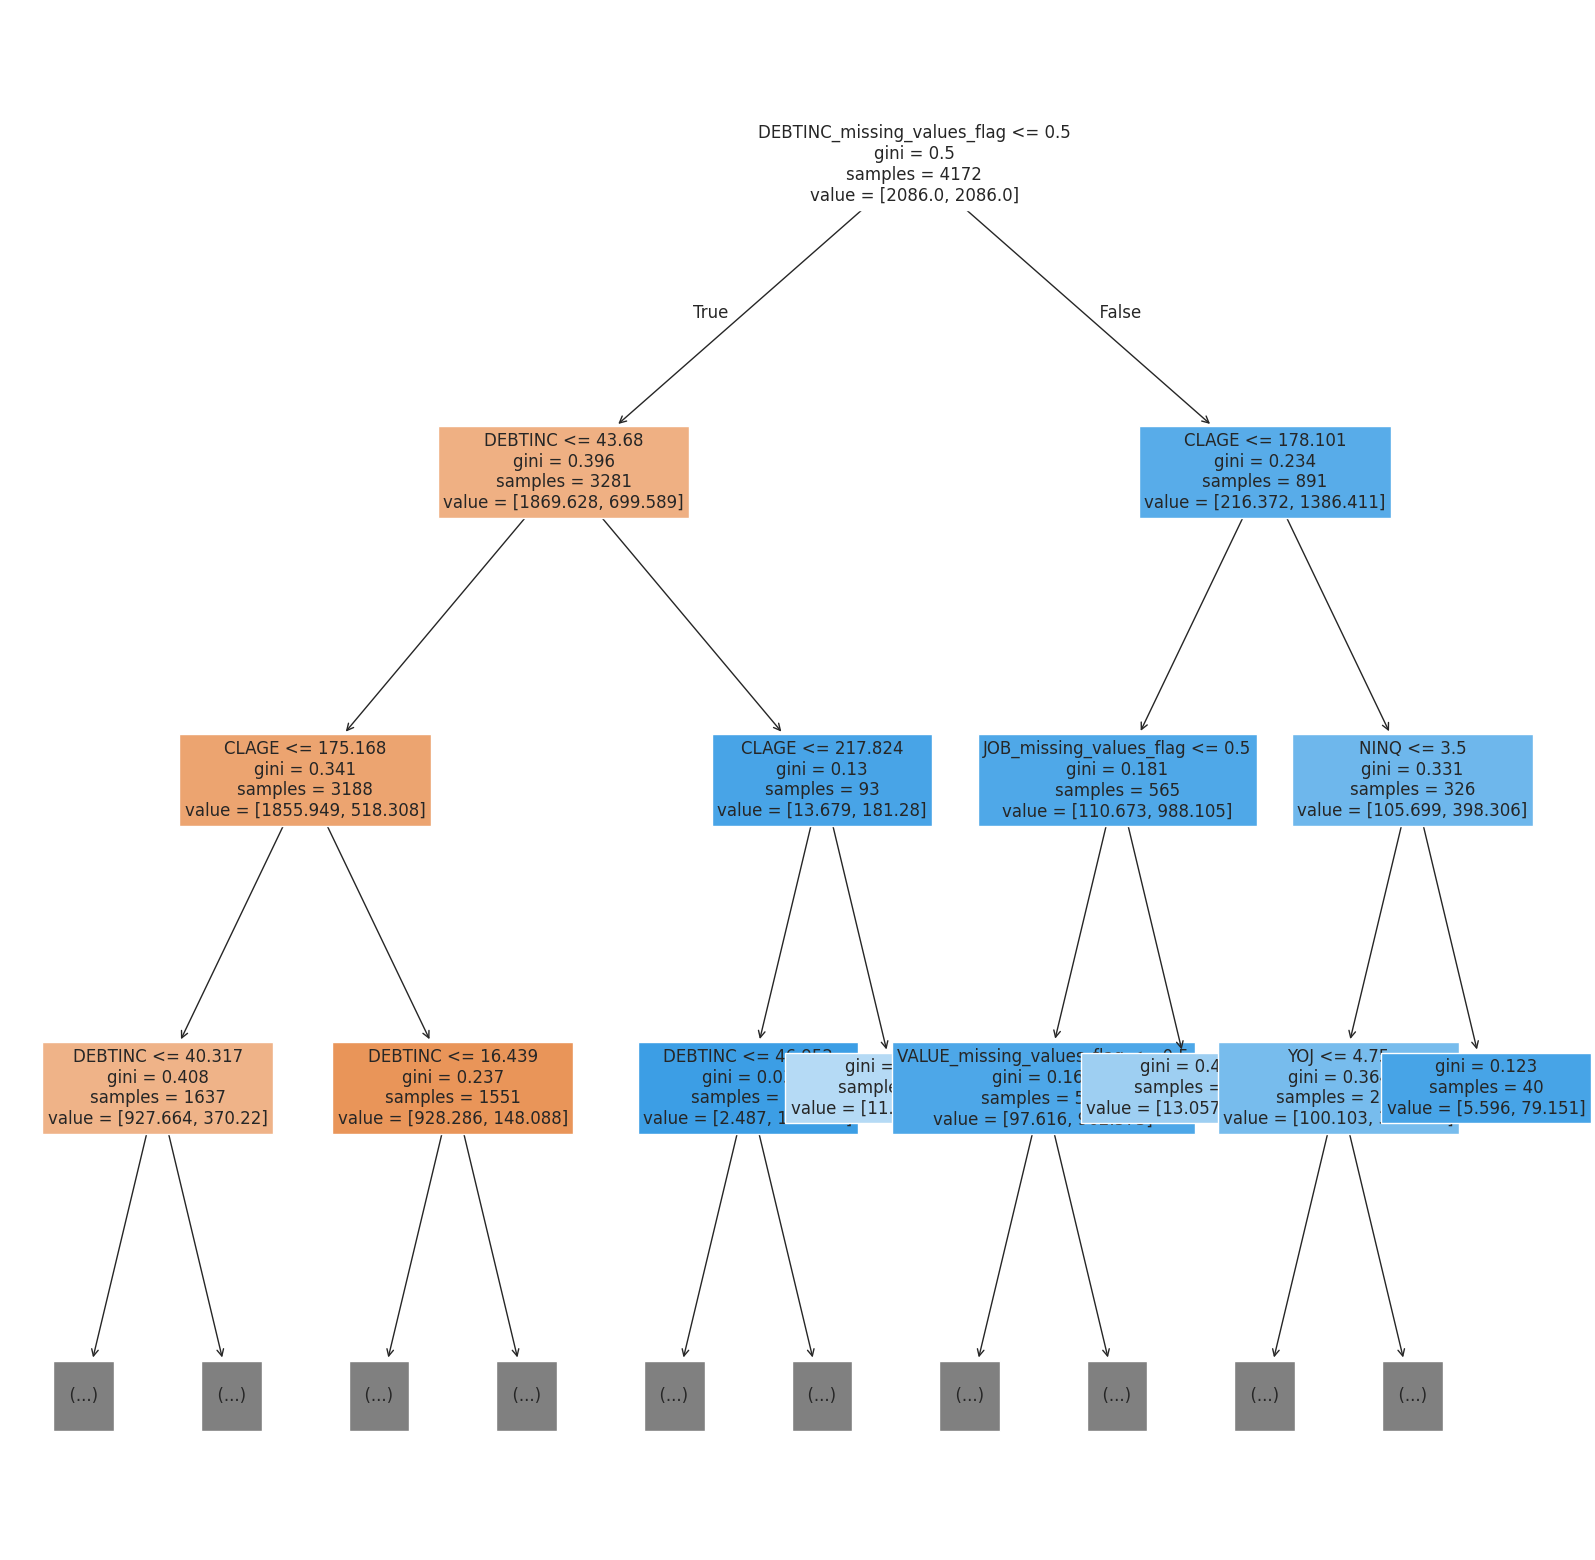

In [ ]:
# Plotting the Decision Tree
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, max_depth = 3, feature_names = features, filled = True, fontsize = 12)

plt.show()

## Observations

* Blue leaves represent the defult loans, i.e., y[1] and the orange leaves represent the reapy loan, i.e., y[0].
* The more the number of observations in a leaf, the darker its color gets.

In [ ]:
# Checking the text representation of Decision Tree
text_representation = tree.export_text(d_tree_tuned, feature_names= features)
print(text_representation)

|--- DEBTINC_missing_values_flag <= 0.50
|   |--- DEBTINC <= 43.68
|   |   |--- CLAGE <= 175.17
|   |   |   |--- DEBTINC <= 40.32
|   |   |   |   |--- DEROG_missing_values_flag <= 0.50
|   |   |   |   |   |--- LOAN <= 9150.00
|   |   |   |   |   |   |--- MORTDUE <= 44875.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- MORTDUE >  44875.50
|   |   |   |   |   |   |   |--- JOB_Other <= 0.50
|   |   |   |   |   |   |   |   |--- LOAN <= 6950.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- LOAN >  6950.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- JOB_Other >  0.50
|   |   |   |   |   |   |   |   |--- MORTDUE <= 60761.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- MORTDUE >  60761.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- LOAN >  9150.00
|   |   |   |   |   |   |--- CLNO <= 5.50
|   |   |   |   |   |   |   |

## Observations

* If there is a missing value for the client's DEBTINC - the client will likely default
* Clients with DEBTINC higher than 43 and CLAGE less than 217 are likely to default -We can see again that the Debt-to-income ratio is the most important driver for defaulting or repaying a loan. The bank should consider this as a top feature to consider while processing a loan request.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



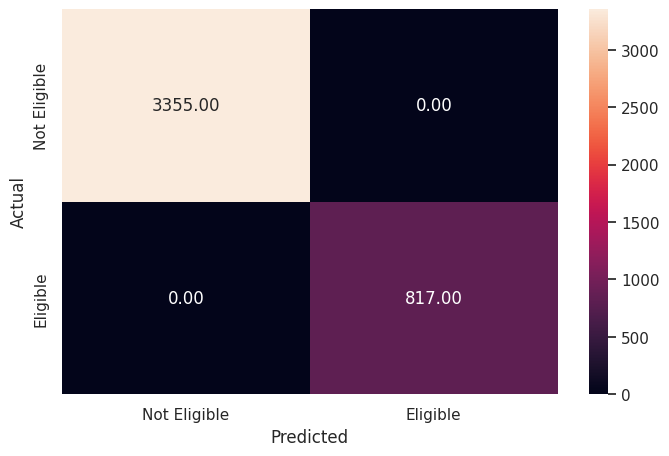

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.81      0.63      0.71       372

    accuracy                           0.89      1788
   macro avg       0.86      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



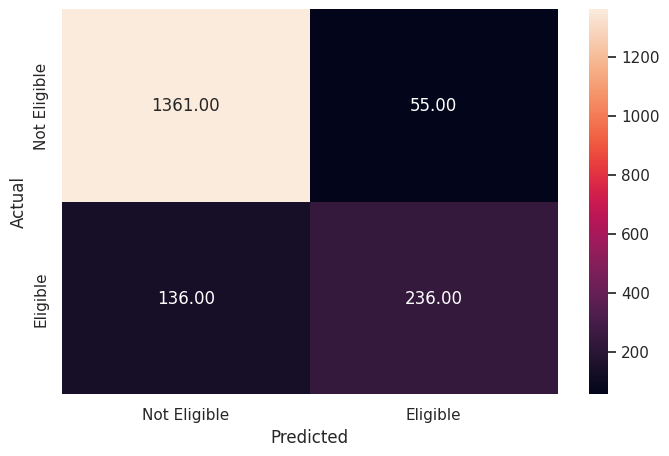

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,X_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.860074,0.797783,0.893177


## Observations

* The Random Forest is giving a 100% score for all metrics on the training dataset.
* The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 63% for class 1.
* Accuracy is good for the test data- 89%.


Since this data is imbalance let's see if we are getting better results using a 'balanced' random forest model

## Random Forest model with balanced class weights

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator_balanced = RandomForestClassifier(class_weight = 'balanced', random_state = 7)
rf_estimator_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



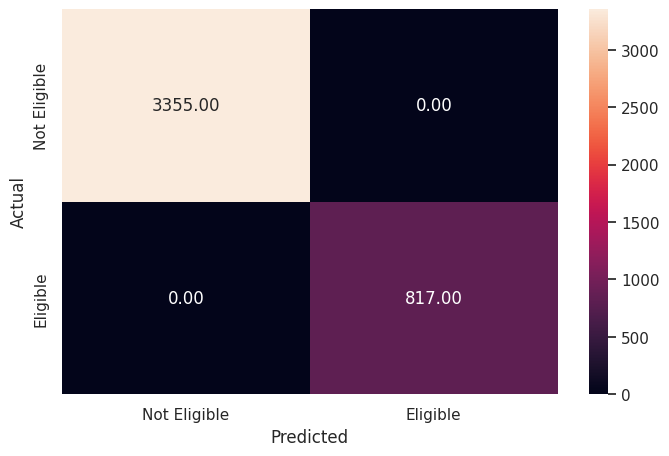

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator_balanced.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1416
           1       0.81      0.60      0.69       372

    accuracy                           0.89      1788
   macro avg       0.86      0.78      0.81      1788
weighted avg       0.88      0.89      0.88      1788



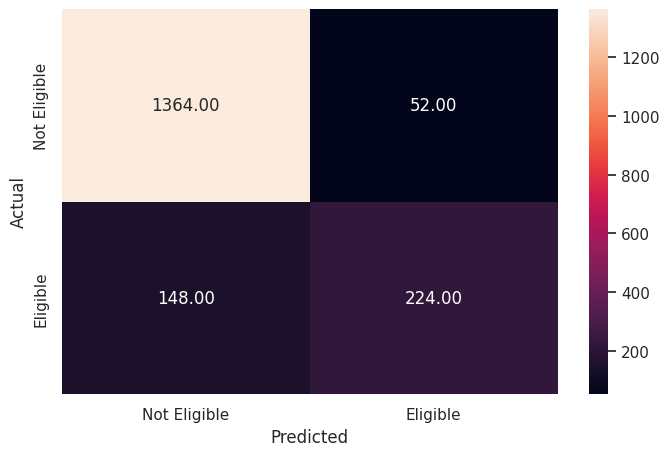

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator_balanced.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [ ]:
rf_estimator_balanced_test = model_performance_classification(rf_estimator_balanced,X_test,y_test)
rf_estimator_balanced_test

,Precision,Recall,Accuracy
0,0.856855,0.782714,0.888143


## Observations

* The balanced Random Forest classifier is also overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 60% for class 1 compared to 63% in the baseline model
* The balanced random forest did not improve the model performance.
* The balanced Random Forest is also giving a 100% score for all metrics on the training dataset.
* Precision is good for the test data- 81%
* Recall is 60% for the test data

### **Random Forest Classifier Hyperparameter Tuning**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

## Tuning the Random Forest

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=0.7,
                       min_samples_leaf=np.int64(3), n_estimators=500,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3355
           1       0.88      0.98      0.93       817

    accuracy                           0.97      4172
   macro avg       0.94      0.97      0.95      4172
weighted avg       0.97      0.97      0.97      4172



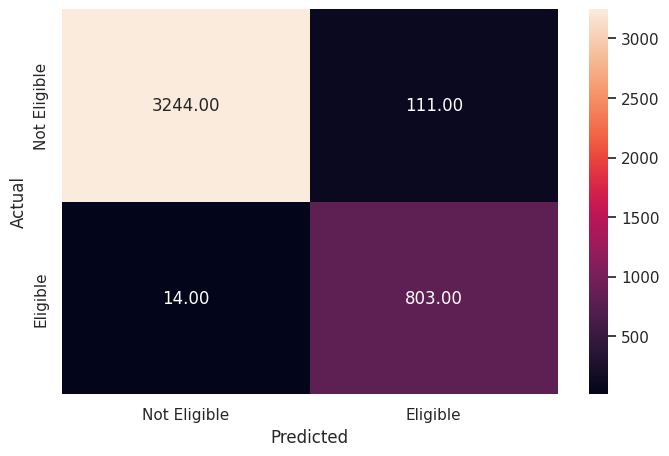

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1416
           1       0.74      0.74      0.74       372

    accuracy                           0.89      1788
   macro avg       0.84      0.84      0.84      1788
weighted avg       0.89      0.89      0.89      1788



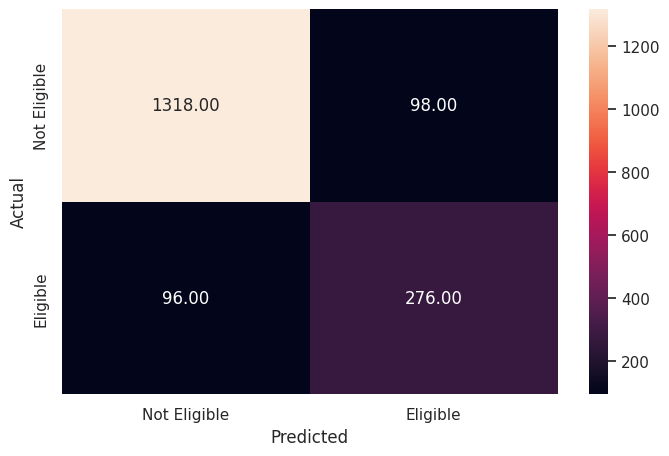

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, X_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.835038,0.836363,0.891499


## Observations

* The tuned random forest improves the model performance.
* The tuned Random Forest is not giving a 100% score for all metrics on the training dataset- there is less overfitting of the training data
* The recall on the training data is 98%, while the recall on the test data is only 74% for class 1 compared to 63% in the baseline model and 60% for the balanced random forest model.
* Precision for the test set is 74%, it has decreased compared to the baseline model and balanced model at 81%, this is expected as we were trying to reduce overfitting
* In our case, we are assessing the model mainly by the recall score. in the tuned random forest we got the lowest number of false negative cases so far.

<Axes: xlabel='Importance', ylabel='None'>

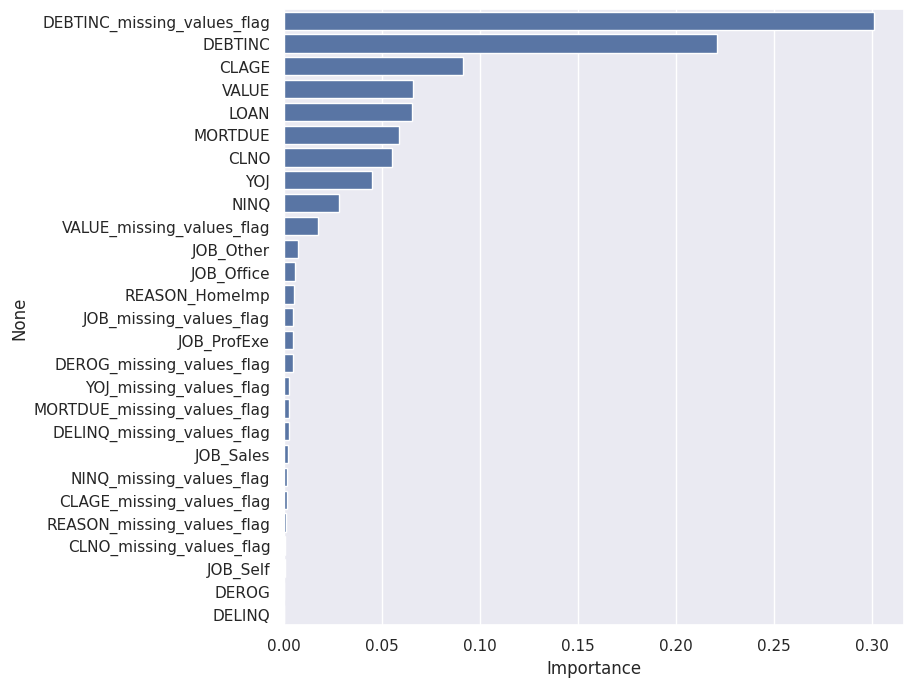

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

## Observations

* The feature importance plot for the random forest suggests that the DEBTINC_missing_values_flag followed by DEBTINC are the most important features. This is similar to the feature importance of the decision tree.
* Other important features are CLAGE, VALUE, LOAN, MORTDUE, and CLNO

## Boosting Models

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [ ]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [ ]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,X_test,y_test)

adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.83827,0.768783,0.878635


In [ ]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, X_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.852236,0.783989,0.887025


In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,X_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.868268,0.812921,0.899888


<Axes: xlabel='Importance', ylabel='None'>

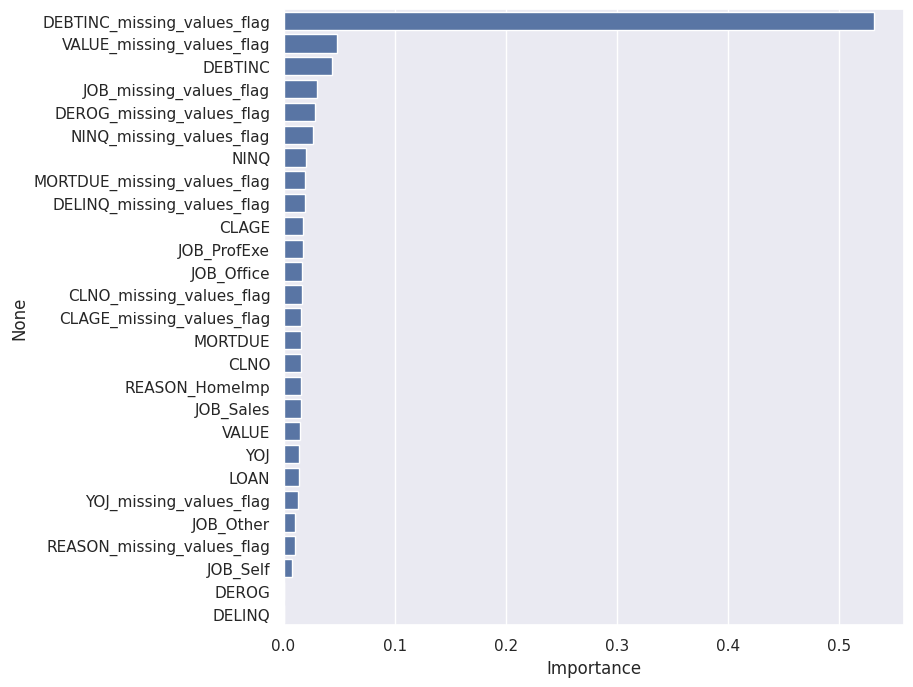

In [ ]:
importances = xgb.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

## Observations

* Again we can see that the DEBTINC_missing_value has the weights the most on the prediction to default a loan. The other features are less important according to this model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []
test_error = []
knn_many_split = {}
error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1, 15):
    train_error = []

    test_error = []

    lista = []

    knn = KNeighborsClassifier(n_neighbors = k)

    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.30)

        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)

        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new))

        test_error.append(1 - knn.score(x_val, y_val))

    lista.append(sum(train_error)/len(train_error))

    lista.append(sum(test_error)/len(test_error))

    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.23112353567625135],
 2: [0.1282077625570776, 0.1848509052183174],
 3: [0.12263698630136988, 0.20095846645367416],
 4: [0.15208904109589044, 0.18711395101171463],
 5: [0.14899543378995433, 0.19337060702875403],
 6: [0.16369863013698632, 0.18567625133120338],
 7: [0.16121004566210048, 0.1861554845580405],
 8: [0.17002283105022833, 0.18594249201277957],
 9: [0.16767123287671234, 0.18383919062832796],
 10: [0.17563926940639268, 0.18328008519701816],
 11: [0.17236301369863008, 0.1838125665601704],
 12: [0.17727168949771688, 0.18703407880724177],
 13: [0.17599315068493157, 0.1854898828541001],
 14: [0.1800799086757991, 0.18801916932907356]}

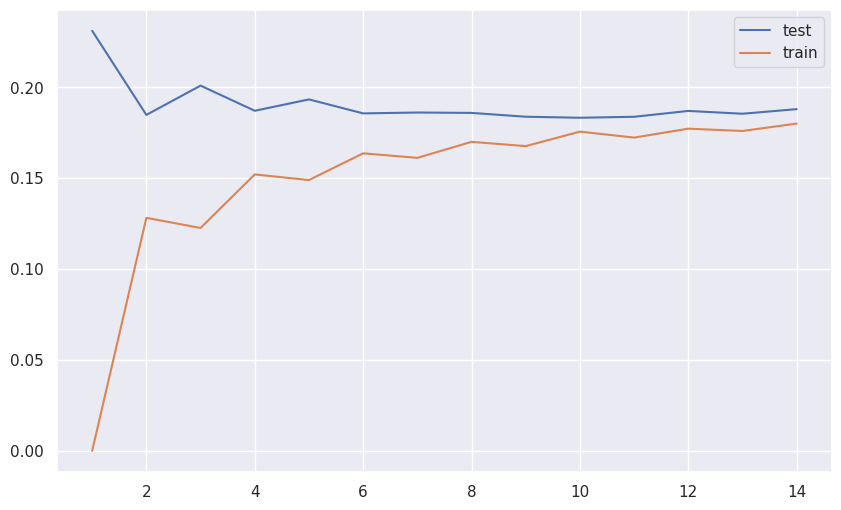

In [ ]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)

    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)

    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

## Observations

* We can see that the test error (error on the validation data) is more or less similar for K greater than or equal to 6. But the training error keeps increasing with increasing K.
* This implies that we would get a lower train and test error if we choose K = 6.
* So, let's fit the K-NN model with K=6 on the entire training set.

In [ ]:
# Define K-NN model

knn = KNeighborsClassifier(n_neighbors = 6)

In [ ]:
# Fitting data to the K-NN model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3355
           1       0.84      0.22      0.35       817

    accuracy                           0.84      4172
   macro avg       0.84      0.61      0.63      4172
weighted avg       0.84      0.84      0.80      4172



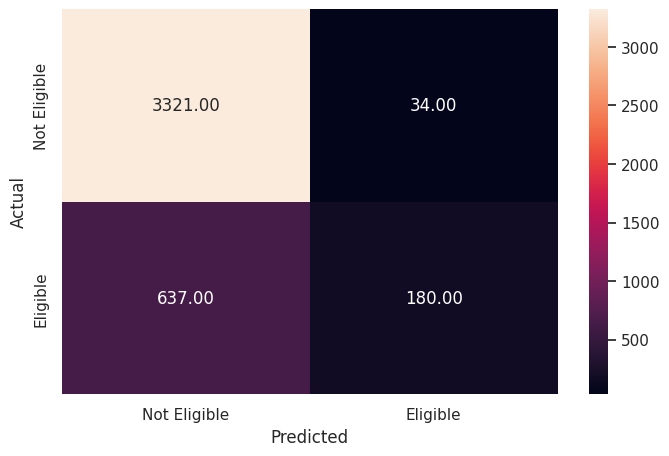

In [ ]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(X_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1416
           1       0.76      0.16      0.26       372

    accuracy                           0.81      1788
   macro avg       0.79      0.57      0.58      1788
weighted avg       0.80      0.81      0.76      1788



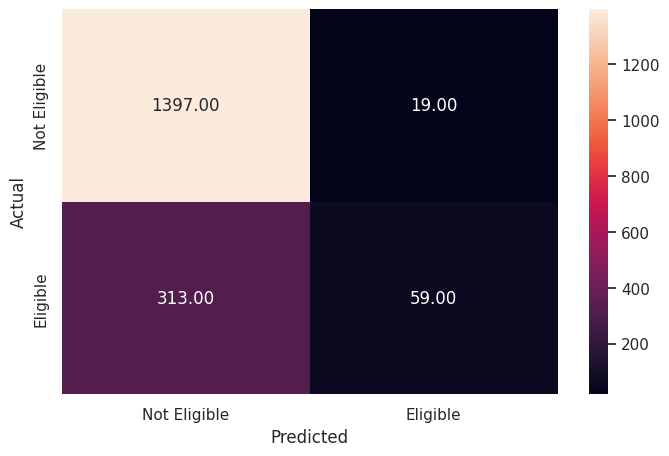

In [ ]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn = knn.predict(X_test)

metrics_score(y_test, y_pred_test_knn)

In [ ]:
knn_test = model_performance_classification(knn, X_test, y_test)
knn_test

,Precision,Recall,Accuracy
0,0.786685,0.572592,0.814318


## Observations

* The model is not performing well.
* The Recall score on the train and test sets are extremely low.
* Let's try to tune this model.

In [ ]:
params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(X_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=np.int64(3), p=1, weights='distance')


We have found the best hyperparameters for the K-NN classifier. Let's use these parameters to build the new K-NN model and find the recall of that model.

In [ ]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(3), p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



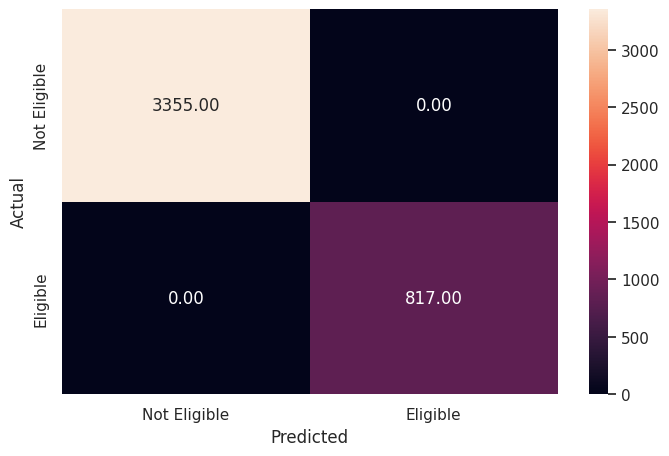

In [ ]:
# Checking train data
y_pred_train_knn_estimator = knn_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1416
           1       0.53      0.27      0.36       372

    accuracy                           0.80      1788
   macro avg       0.68      0.61      0.62      1788
weighted avg       0.77      0.80      0.77      1788



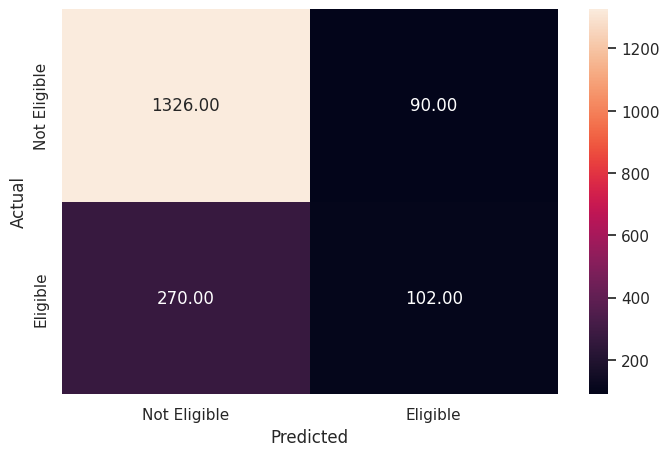

In [ ]:
# Checking test data
y_pred_test_knn_estimator = knn_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_knn_estimator)

In [ ]:
knn_tuned_test = model_performance_classification(knn_estimator, X_test, y_test)
knn_tuned_test

,Precision,Recall,Accuracy
0,0.681039,0.605317,0.798658


## Observations

* The tuned model is overfitting the train data.
* The recall and precision scores for the test data are low.
* The tuned model is not performing well.

## Comparing Model Performances

In [ ]:
models_test_comp_df = pd.concat(

    [
    lg_test.T, lg_6_test.T, lg_45_test.T,
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_balanced_test.T, rf_estimator_tuned_test.T,
    adaboost_model_perf_test.T, gbc_perf_test.T, xgb_perf_test.T, knn_test.T, knn_tuned_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = [
    "Logistic regresstion model",
    "Logistic regresstion model using 0.6 treshold",
    "Logistic regresstion model using 0.45 treshold",
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Balanced Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "gbc classifier",
    "XGBoost classifier",
    "KNN",
    "Tuned KNN"
]

print("Test performance comparison:")

Test performance comparison:


In [ ]:
models_test_comp_df.T

,Precision,Recall,Accuracy
Logistic regresstion model,0.595845,0.644079,0.623043
Logistic regresstion model using 0.6 treshold,0.595845,0.644079,0.623043
Logistic regresstion model using 0.45 treshold,0.595845,0.644079,0.623043
Decision Tree classifier,0.801091,0.759887,0.862975
Tuned Decision Tree classifier,0.749346,0.810336,0.828300
Random Forest classifier,0.860074,0.797783,0.893177
Balanced Random Forest classifier,0.856855,0.782714,0.888143
Tuned Random Forest classifier,0.835038,0.836363,0.891499
Adaboost classifier,0.838270,0.768783,0.878635
gbc classifier,0.852236,0.783989,0.887025


## Conclusion

* Multiple models were tested and was able to identfy the key factors involved with loan default.
* The best model we have got is the tuned random forest model which is giving an average of 83% recall for class 1 on the test data, 83% precision score, and 89% accuracy- These parameters are meeting the model evolution criteria that were defined in the begining of the project.
* The prominent feature that is the most impactful in the change to default on a loan is the DEBTINC_missing_values_flag followed by DEBTINC. This emphasizes the impact of missing values on the prediction and should be communicated to the data entry team. A high debt-to-income ratio indicates that the applicant can not afford his/hers monthly mortgage payments and having too much debt can be a sign of missing a payment or defaulting on the loan. The bank should consider this as a top feature to consider while processing a loan request.
* More feature that positively affect loan default is the age of the oldest credit line in months.
* We can see that the financial background is more relevant than the job profile, the reason for the loan, the actual amount of the mortgage, the value of the property, and the amount of loan that was requested.
* The bank should consider CLAGE, VALUE, LOAN, MORTDUE, and CLNO as a set of features that have a high impact on defaulting on a loan.
* The 'personal' features like the employment profile, and the loan reason request are nice to have rather than must have, and therefore should not be the main focus when processing a loan application.
* This model is good and does not requires further tuning.
* The bank can use this model to predict clients who are likely to default on their loan
* In boosting algorithms, XGBoost has given good scores among other algorithms, but since we are focused on getting a high recall score the tuned RF classifier is a better fit for our case.
* The final model, a hyperparameter-tuned K-NN classifier, is overfitting on the training dataset and gives low recall on the testing datasets.
* Based on the models that were tested we can conclude that the debt-to-income ratio is the most impact feature in the chance to default on a loan.

## **Executive Summary**

* The main objective of the project was to construct a robust classification model to predict the customers at risk of defaulting on their loans. The strategy involved maximizing recall to minimize the false negatives. The secondary objective was to maintain a high F-1 score to ensure overall accuracy and mitigate the potential loss of the banks interest profit due to false positives without affecting the recall.

* The best model is our Hyper-Tuned Random forest model with 83% on both recall and percision and 89% accuracy. Through our analysis we found that the most powerful feature to predict if the customer will default was the DEBTINC. ("Debt to income") This feature had the most missing values, hence we had to be more careful when gathering the data to impute these missing values.




## **Problem and Solution Summary**

**Problem statement**

* Loan defaults can significantly decrease a banks profitabliity, reduce its lending potential, and can have a major impact in the banks ability to survive long term. Not only can banks lose a significant portion of their profits from defaulted loans, the overall underwriting process to approve loans is effort intensive and can include bias and human error. It is paramount that banks identify a more effective, machine driven process to identify creditworthy customers to reduce bias in decision making and human error, increase profitability and in turn offer more lending services to their customers. A collective reduction in default loans across banks can lead to overall stonger lending power and facilitate economic growth.

**Solution Summary**

* Missing Data- For the Tuned random forest and XGboost algorithms, a variety of data imputations methods were evaluated to replace missing values. Combines performance on the test data for precision, recall, and accuracy were above 80%. Other imputation approaches resulted in the scores being under 80%.

* Model- The objective was to ensure that the bank can most accurately predict default. Recall was selected as a key metric for model evaluation as it demonstrates the models ability to accurately predict bad loans when they are fact bad. The model with the best overall performance is the Tuned Random Forest classifier. In this type of classification problem, the key points that describe the final solution design are around maximizing the true positives which means being able to correctly identify/predict class 1 of clients that defaulted on loan to avoid money loss for the bank. The Tuned Random Forest and XG boost classifiers offer better recalls (83%, 81% respectively) over the other models. But the XG boost model has a higher amount of missing data in the feature importance which may lead to false information and bias in the model. This also had a lower recall (81%) than the Tuned Random Forest model but a higher precision (86%) Therefore in  the current project the Tuned Decision Tree classifier shows good scores with a high precision which means the solution has a low number of false positives. This model proves to be ready to be deployed into production.

## **Recommended Next Steps & Conclusions**

* The projects insights provide actionable recommendations for the banks loan approval process and underscore the significance of maximizing recall and give more importance to these variables such as DEBTINC, DELINQ, CLAGE, and DEROG when deciding to get a loan.

* Its recommended to create another model using more data from more users to have astronger and robust model. The data gathering should be managed more carfully as well as imputting the data. Mainly because of the fact that the project has a lot of missing data, specifically for the DEBTINC, the most important feature had the most missing data.

* Build a feedback loop for the bank employees to provide insights on the models performance in real world scenarios. Also having tests on how the customers response changes or not. This helps to make sure the data analysis team has enoough insight for model improvement.

* Conduct training sessions for bank employees to ensure a thorough understanding of the models outputs, its role in decision making, and the implications of its recommendations. As well as having a data analysis team that can monitor, evaluate, and improve the models regularly to ensure the overall effectiveness.

* Random Forest models can provide substantial economic benefits. Their overall success depends on the quality and relevance of the data used for training and continuous monitoring to adapt to evolving economic conditions. This is why the previous recommendations are highly advised to have a robust and updated model that can predict more accurately.



## **Risks & Challenges**

**Trust and Transparency**
* Risk- Lack of transparency in decision making.
* Challenge- Clear communication, transparency in explaining model functioning.

**Bias in Data**
* Risk- Inherent biases in historical data.
* Challenge- Regular monitoring and audits to identify and address biases.

**Model Overfitting**
* Risk- Overfitting to training data.
* Challenge- Regular evaluation on diverse datasets, cross validation to prevent overfitting.

**Data Privacy and security**
* Risk- Privacy and security concerns with sensitive customer data.
* Challenge- Compliance with data protection regulations, robust data secuirty measures.